# Supervised Learning

In [211]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# 1. Dataset

In [119]:
# Load your data

water = pd.read_json ('https://data.cityofnewyork.us/resource/ia2d-e54m.json')

In [123]:
water.head()

,year,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198


# 2. Pandas Dataframe

In [210]:
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 4 columns):
year                                       40 non-null int64
new_york_city_population                   40 non-null float64
nyc_consumption_million_gallons_per_day    40 non-null float64
per_capita_gallons_per_person_per_day      40 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.6 KB


In [125]:
water.describe()

,year,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day
count,40.000000,4.000000e+01,40.000000,40.000000
mean,1998.500000,7.794862e+06,1228.540000,159.425000
std,11.690452,4.665209e+05,176.152726,31.989491
min,1979.000000,7.071639e+06,990.200000,117.000000
25%,1988.750000,7.343750e+06,1061.500000,130.750000
50%,1998.500000,7.902960e+06,1228.350000,155.000000
75%,2008.250000,8.145933e+06,1372.250000,186.500000
max,2018.000000,8.475976e+06,1512.000000,213.000000


In [126]:
#Getting rid of null values
water= water.dropna(how='any',axis=0) 

### Exploratory Analysis

In [183]:
water1 = water[['per_capita_gallons_per_person_per_day']]

In [184]:
water2 = water.drop('per_capita_gallons_per_person_per_day',axis = 1)

In [185]:
X = water2
y = water1

In [186]:
X.head()

,year,new_york_city_population,nyc_consumption_million_gallons_per_day
0,1979,7102100.0,1512.0
1,1980,7071639.0,1506.0
2,1981,7089241.0,1309.0
3,1982,7109105.0,1382.0
4,1983,7181224.0,1424.0


In [187]:
y.head()# target attribute

,per_capita_gallons_per_person_per_day
0,213
1,213
2,185
3,194
4,198


In [208]:
def scatter_plot(feature,target):
	plt.figure(figsize=(16,8))
	plt.scatter(
	    X[feature],
	    y[target],
	    c= 'red'
	)
    

Text(0.5, 1.0, 'water consumption per year in NYC')

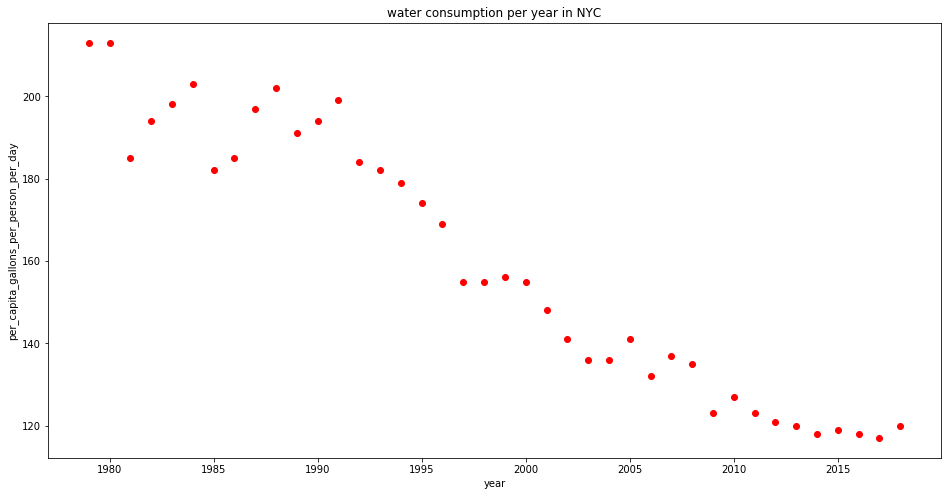

In [209]:
scatter_plot('year','per_capita_gallons_per_person_per_day')
plt.ylabel('per_capita_gallons_per_person_per_day') #title
plt.xlabel('year') #title
plt.title('water consumption per year in NYC') 

# 3. Testing/Training

In [214]:
# testing/training split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    

# K-Nearest Neighbor

In [189]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [194]:
y_pred = classifier.predict(X_test)

In [195]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

         117       0.00      0.00      0.00         0
         118       0.00      0.00      0.00         2
         120       0.00      0.00      0.00         1
   

In [203]:
error = []

for i in range(1,20 ):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i=pred_i.reshape(16,1)
    error.append(np.mean(pred_i != y_test))

# Visualization

Text(0, 0.5, 'Mean Error')

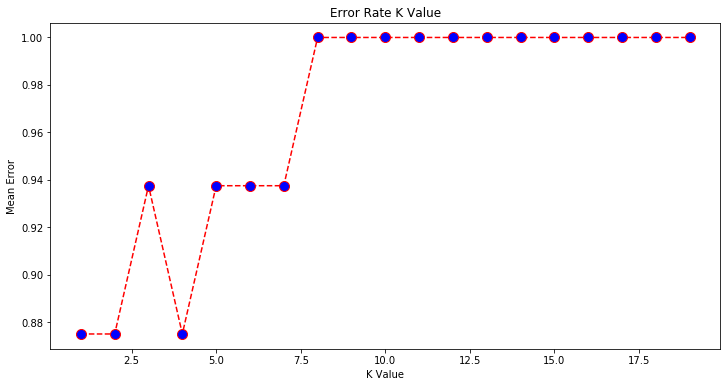

In [204]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [260]:
knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=2)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.05 0.  ]
cv_scores mean:
0.025


# Evaluation Metrics

In [244]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.99


In [245]:
from sklearn.metrics import mean_squared_error
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, reg.predict(X_test))))

Test set RMSE: 6.16


In [246]:
from sklearn.metrics import mean_absolute_error
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, reg.predict(X_test))))

Test set MSE: 2.06


# Linear Regression

In [216]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


In [234]:
y_pred = lr.predict(X_test)

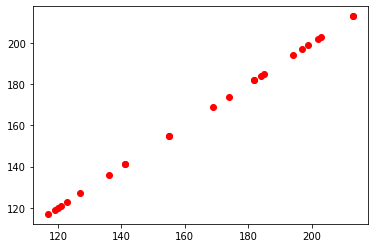

In [242]:
X_train =y_train

plt.scatter(X_train, y_train, color = "red")
  

In [193]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


In [251]:
from sklearn.metrics import mean_absolute_error
print("Test set MSE: {:.2f}".format(mean_absolute_error(y_test, X_test)))

Test set MSE: 0.00


In [249]:
from sklearn.metrics import mean_squared_error
print("Test set RMSE: {:.2f}".format(mean_squared_error(y_test, X_test)))

Test set RMSE: 0.00


In [258]:
from sklearn.metrics import r2_score
print(r2_score(X_test,y_test))

1.0


# Lasso Regression

In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 1.00
Test set score: 1.00
Number of features used: 3


In [69]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 1.00
Test set score: 1.00
Number of features used: 3


In [70]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 1.00
Test set score: 1.00
Number of features used: 3
